In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("telefon_fiyatlari.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
#price_range için hangi değerler olduğunu kontrol ediyorum
print(df['price_range'].unique())

[1 2 3 0]


In [5]:
#boş değer olup olmadığını kontrol ediyorum
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
#verilerimin türlerini kontrol ediyorum bağımlı değişkenimi kategorik yapmalıyım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
#verilerimi kategorik hale getiriyorum ucuz ve pahalı arasında derecelendirme olduğu için sıralamamı belirtip sıralı kategorik değişken yapıyorum
df['price_range'] = pd.Categorical(df['price_range'], categories=[0,1,2,3], ordered=True)

In [8]:
#dönüştürme sonrası verilerimin türünü kontrol ediyorum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   int64   
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   int64   
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   int64   
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   in

## Grid Search

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### orijinal verisetini değiştirmemek için kopyalıyorum

In [10]:
df_copy = df.copy()

#### bağımlı ve bağımsız değişkenlerimi ayırıyorum

In [11]:
X = df_copy.drop(["price_range"], axis = 1)
y = df_copy["price_range"]

In [12]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [13]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [14]:
#test veri setim %20 olacak şekilde eğitim ve test verilerimi ayırıyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### verileri standardize ediyorum

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#deneyeceğim modelleri sözlük yapısında belirtiyorum ve her bir modeli de liste olarak modelste tutuyorum
models = [
    {'name': 'RandomForest', 'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}},
    {'name': 'SVM', 'model': SVC(), 'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}},
    {'name': 'LogisticRegression', 'model': LogisticRegression(), 'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}},
    {'name': 'DesicionTree', 'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random']}}
]

In [17]:
from sklearn.base import clone

In [18]:
i=0;
basari = [0] * len(models)
#tüm modelleri tek tek gezerek her biri için en iyi modeli tutuyorum
for model_info in models:
    model = model_info['model']
    param_grid = model_info['params']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs = -1, verbose = 1)
    grid_search.fit(X_train_scaled, y_train)
    
    
    current_grid_search = clone(grid_search)

    if i == 0:
        model_RandomForest = current_grid_search.fit(X_train_scaled, y_train).best_estimator_
    elif i == 1:
        model_SVM = current_grid_search.fit(X_train_scaled, y_train).best_estimator_
    elif i == 2:
        model_LogisticRegression = current_grid_search.fit(X_train_scaled, y_train).best_estimator_  
    elif i == 3:
        model_DesicionTree = current_grid_search.fit(X_train_scaled, y_train).best_estimator_

    print(f"Best parameters for {model_info['name']}: {current_grid_search.best_params_}")
    print(f"Best score: {current_grid_search.best_score_}\n")
    basari[i] = current_grid_search.best_score_ #model için en iyi skoru basari listesinin içinde tutuyorum

    i+=1

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8775000000000001

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best score: 0.9575000000000001

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'none'}
Best score: 0.9637499999999999

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for DesicionTree: {'criterion': 'entropy', 'splitter': 'best'}
Best score: 0.8487499999999999



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

In [19]:
#models listesindeki modellerin adlarını model_nameste tutuyorum
model_names = [model['name'] for model in models]

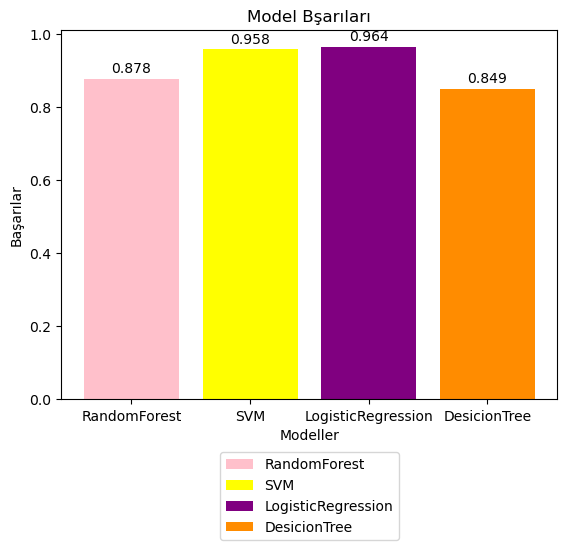

In [20]:
colors = ['pink', 'yellow', 'purple', 'darkorange']

for i in range(len(model_names)):
    plt.bar(model_names[i], basari[i], color=colors[i], label=model_names[i])
    plt.text(model_names[i], basari[i] + 0.01, round(basari[i], 3), ha='center', va='bottom')
    
plt.xlabel('Modeller')
plt.ylabel('Başarılar')
plt.title('Model Bşarıları')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.show()

#### Grafiğe bakarark en başarılı modelin logistic regression modeli olduğunu söyleyebiliriz. Logistic regression için en iyi model 'model_LogisticRegression' idi. Bu modeli test veri seti üzerinde tahminlerini yaptıralım.

In [21]:
y_head = model_LogisticRegression.predict(X_test_scaled)
y_proba = model_LogisticRegression.predict_proba(X_test_scaled) # roc auc için oran gerekecek

### Sınıflandırma metrikleri

#### sınıflandırma metriklerini kullanmak için gerekli kütüphaneleri import edelim

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [23]:
# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_head)
print(f"Doğruluk: {accuracy}")

Doğruluk: 0.975


In [24]:
# Hassasiyet (Precision)
precision = precision_score(y_test, y_head, average='micro')
print(f"Hassasiyet: {precision}")

Hassasiyet: 0.975


In [25]:
# Duyarlılık (Recall)
recall = recall_score(y_test, y_head, average='micro')
print(f"Duyarlılık: {recall}")


Duyarlılık: 0.975


In [26]:
# F1 Skoru
f1 = f1_score(y_test, y_head, average='macro')
print(f"F1 Skoru: {f1}")

F1 Skoru: 0.9745599607364314


In [27]:
# ROC AUC Skoru
roc_auc = roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr')
print(f"ROC AUC Skoru: {roc_auc}")

ROC AUC Skoru: 0.9995481140061954


### Karmaşıklık matrisini seaborn kütüphanesinin heatmap fonksiyonu ile çizdirelim

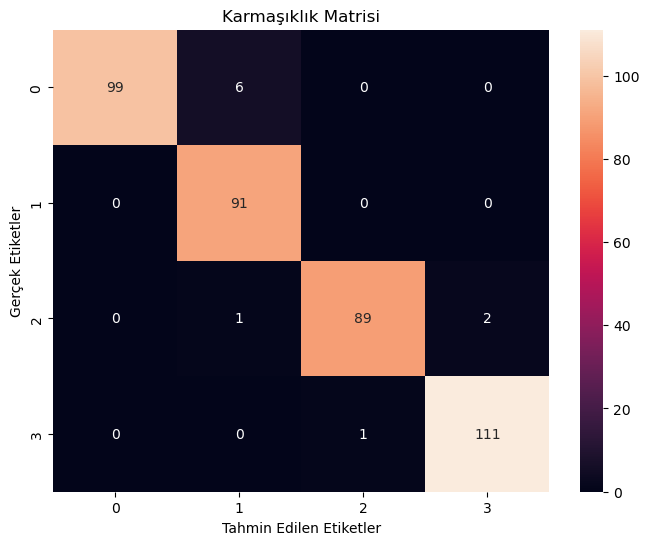

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_head)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=set(y_test), yticklabels=set(y_head))
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [29]:
df_planlanan = pd.read_excel("planlanantelefon.xlsx")

In [30]:
df_planlanan

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,NaN,18,0,2,1,0,0


In [31]:
df_planlanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1 non-null      int64  
 1   blue           1 non-null      int64  
 2   clock_speed    1 non-null      float64
 3   dual_sim       1 non-null      int64  
 4   fc             1 non-null      int64  
 5   four_g         1 non-null      int64  
 6   int_memory     1 non-null      int64  
 7   m_dep          1 non-null      float64
 8   mobile_wt      1 non-null      int64  
 9   n_cores        1 non-null      int64  
 10  pc             1 non-null      int64  
 11  px_height      1 non-null      int64  
 12  px_width       1 non-null      int64  
 13  ram            0 non-null      float64
 14  sc_h           1 non-null      int64  
 15  sc_w           1 non-null      int64  
 16  talk_time      1 non-null      int64  
 17  three_g        1 non-null      int64  
 18  touch_screen  

In [32]:
ram_Miktarı = list(range(256,4097,256))

In [33]:
ram_Miktarı

[256,
 512,
 768,
 1024,
 1280,
 1536,
 1792,
 2048,
 2304,
 2560,
 2816,
 3072,
 3328,
 3584,
 3840,
 4096]

In [34]:
df_planlananc = df_planlanan.copy() #asıl veri setimi korumak için kopyalıyorum

In [35]:
df_planlananc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,NaN,18,0,2,1,0,0


In [36]:
for ram in ram_Miktarı:    
    yeni_veri = df_planlananc.iloc[0].copy()  # Mevcut bir satırı kopyalayalım
    yeni_veri['ram'] = ram  #Ram miktarını değiştiriyorum
    df_planlananc = df_planlananc.append(yeni_veri, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6704\2764493188.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlananc = df_planlananc.append(yeni_veri, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6704\2764493188.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlananc = df_planlananc.append(yeni_veri, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6704\2764493188.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlananc = df_planlananc.append(yeni_veri, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6704\2764493188.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plan

In [37]:
df_planlananc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,NaN,18.0,0.0,2.0,1.0,0.0,0.0
1,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,256.0,18.0,0.0,2.0,1.0,0.0,0.0
2,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,512.0,18.0,0.0,2.0,1.0,0.0,0.0
3,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,768.0,18.0,0.0,2.0,1.0,0.0,0.0
4,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1024.0,18.0,0.0,2.0,1.0,0.0,0.0
5,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1280.0,18.0,0.0,2.0,1.0,0.0,0.0
6,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1536.0,18.0,0.0,2.0,1.0,0.0,0.0
7,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1792.0,18.0,0.0,2.0,1.0,0.0,0.0
8,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,2048.0,18.0,0.0,2.0,1.0,0.0,0.0
9,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,2304.0,18.0,0.0,2.0,1.0,0.0,0.0


In [38]:
# nan olan satırı temizledim ve tekrar kontrol ettim reset index ile indexler sıralandı
df_planlananc = df_planlananc.dropna()
df_planlananc = df_planlananc.reset_index(drop=True)
df_planlananc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,256.0,18.0,0.0,2.0,1.0,0.0,0.0
1,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,512.0,18.0,0.0,2.0,1.0,0.0,0.0
2,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,768.0,18.0,0.0,2.0,1.0,0.0,0.0
3,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1024.0,18.0,0.0,2.0,1.0,0.0,0.0
4,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1280.0,18.0,0.0,2.0,1.0,0.0,0.0
5,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1536.0,18.0,0.0,2.0,1.0,0.0,0.0
6,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1792.0,18.0,0.0,2.0,1.0,0.0,0.0
7,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,2048.0,18.0,0.0,2.0,1.0,0.0,0.0
8,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,2304.0,18.0,0.0,2.0,1.0,0.0,0.0
9,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,2560.0,18.0,0.0,2.0,1.0,0.0,0.0


In [39]:
#verisetim için eğittiğim modelle tahminlerini tahmin listesinde tuttum
tahmin = model_LogisticRegression.predict(df_planlananc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


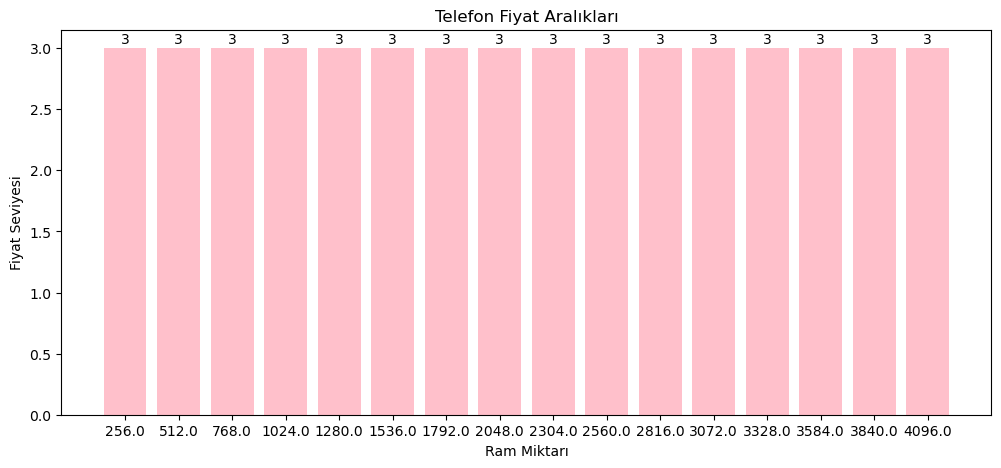

In [40]:
plt.figure(figsize=(12, 5))

for i in range(len(ram_Miktarı)):
    plt.bar(df_planlananc.index[i], tahmin[i], color='pink')
    plt.text(df_planlananc.index[i], tahmin[i] + 0.01, round(tahmin[i], 3), ha='center', va='bottom')
    
plt.xticks(df_planlananc.index, df_planlananc['ram']) #x ekseninde sabit aralıklar yerine verisetindeki değerler yazsın diye xticks kullandım
plt.xlabel('Ram Miktarı')
plt.ylabel('Fiyat Seviyesi')
plt.title('Telefon Fiyat Aralıkları')

plt.show()

In [41]:
#deneyeceğim çekirdek değerlerini cekirdek listesinde tuttum
cekirdek = list(range(1,9))
cekirdek

[1, 2, 3, 4, 5, 6, 7, 8]

In [42]:
#ilk verisetim kaybolmasın diye kopyaladım
df_planlanan_cekirdek = df_planlanan.copy()

In [43]:
df_planlanan_cekirdek #veri setimi kontrol ettim

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,NaN,18,0,2,1,0,0


In [44]:
for cek in cekirdek:
    for ram in ram_Miktarı:    
        yeni_veri = df_planlanan_cekirdek.iloc[0].copy() # Mevcut bir satırı kopyaladım
        yeni_veri['ram'] = ram #Ram miktarını değiştirdim
        yeni_veri['n_cores'] = cek #Çekirdek miktarını değiştirelim
        df_planlanan_cekirdek = df_planlanan_cekirdek.append(yeni_veri, ignore_index=True) #değiştirdiğim verimi veri setime ekledim

C:\Users\HP\AppData\Local\Temp\ipykernel_6704\1568656439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlanan_cekirdek = df_planlanan_cekirdek.append(yeni_veri, ignore_index=True) #değiştirdiğim verimi veri setime ekledim
C:\Users\HP\AppData\Local\Temp\ipykernel_6704\1568656439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlanan_cekirdek = df_planlanan_cekirdek.append(yeni_veri, ignore_index=True) #değiştirdiğim verimi veri setime ekledim
C:\Users\HP\AppData\Local\Temp\ipykernel_6704\1568656439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_planlanan_cekirdek = df_planlanan_cekirdek.append(yeni_veri, ignore_index=True) #değiştirdiğim verimi veri setime ekledim
C:\Users\HP\AppData\Local\Temp\

In [45]:
#nan değerlerini sildim
df_planlanan_cekirdek = df_planlanan_cekirdek.dropna()
df_planlanan_cekirdek = df_planlanan_cekirdek.reset_index(drop=True) # dropnadan sonra reset_index kullanmazsak sildiğimizde indexler değişmeden kalır kullanırsak tekrar sıralanmış olur
df_planlanan_cekirdek

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,1.0,17.0,607.0,748.0,256.0,18.0,0.0,2.0,1.0,0.0,0.0
1,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,1.0,17.0,607.0,748.0,512.0,18.0,0.0,2.0,1.0,0.0,0.0
2,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,1.0,17.0,607.0,748.0,768.0,18.0,0.0,2.0,1.0,0.0,0.0
3,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,1.0,17.0,607.0,748.0,1024.0,18.0,0.0,2.0,1.0,0.0,0.0
4,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,1.0,17.0,607.0,748.0,1280.0,18.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,8.0,17.0,607.0,748.0,3072.0,18.0,0.0,2.0,1.0,0.0,0.0
124,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,8.0,17.0,607.0,748.0,3328.0,18.0,0.0,2.0,1.0,0.0,0.0
125,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,8.0,17.0,607.0,748.0,3584.0,18.0,0.0,2.0,1.0,0.0,0.0
126,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,8.0,17.0,607.0,748.0,3840.0,18.0,0.0,2.0,1.0,0.0,0.0


In [46]:
#oluşan verissetimi eğittiğim modelde tahmin ettirip tahminleri tahminler listesinde tuttum
tahminler = model_LogisticRegression.predict(df_planlanan_cekirdek)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


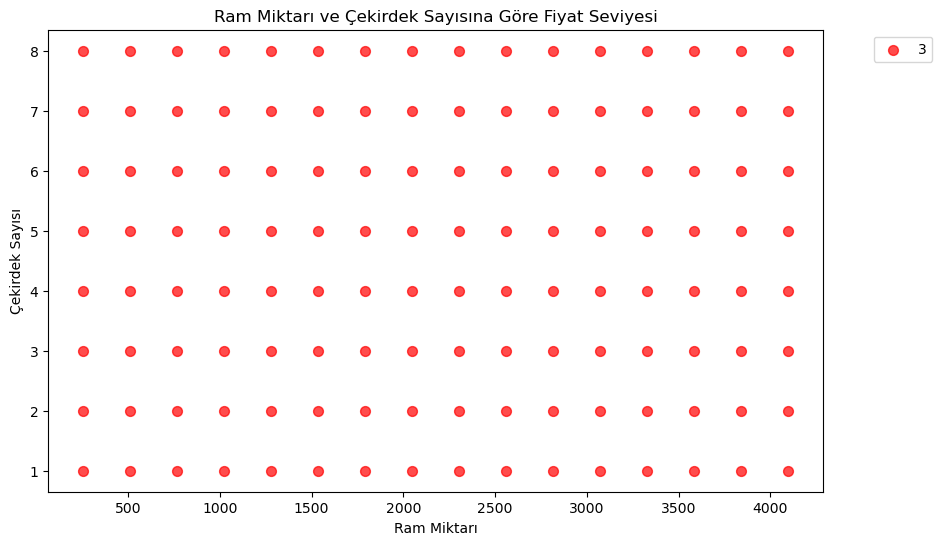

In [47]:
colors = {0: 'g', 1: 'yellow', 2: 'orange', 3: 'red'}

plt.figure(figsize=(10, 6)) #grafik boyutunu ayarlamak için kullandım
legend_handles = {}

for i in range(len(df_planlanan_cekirdek)):
    color = colors[tahminler[i]]
    if color not in legend_handles:
        legend_handles[color] = plt.scatter([], [], c=color, s=50, alpha=0.7, label=tahminler[i])

    plt.scatter(df_planlanan_cekirdek['ram'][i], df_planlanan_cekirdek['n_cores'][i], c=color, s=50, alpha=0.7)

plt.xlabel('Ram Miktarı')
plt.ylabel('Çekirdek Sayısı')
plt.title('Ram Miktarı ve Çekirdek Sayısına Göre Fiyat Seviyesi')

plt.legend(handles=list(legend_handles.values()), loc='upper right', bbox_to_anchor=(1.15, 1))  #legend_handles anlamlarını bir kere yazmamızı sağlar tahminler arasında 0, 1 veya 2 olsaydı onları da ekleyecekti
plt.show()